In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import os

In [3]:
#model_stem='SeSvm'
# model_stem='PlvSeSvm'
# model_dir='/home/dgroppe/GIT/ISSCC18_NURIP/python3/EU1096/MODELS/'
model_stem='gen_sbox_se'
model_dir='/Users/davidgroppe/PycharmProjects/SZR_ANT/MODELS/'
in_fname=os.path.join(model_dir,model_stem,'classify_metrics_srch.npz')
metrics=np.load(in_fname)
metrics.keys()
# C_srch=list()
# valid_bal_acc_srch=list()
# train_bal_acc_srch=list()
# model_names_srch=list()
# gamma_srch=list()
# for f in os.listdir(model_dir):
#     f_splt=f.split('_')
#     if f_splt[0]==model_stem:
#         # model of desired type
#         in_fname=os.path.join(model_dir,f,model_stem+'.npz')
#         temp=np.load(in_fname)
#         C_srch=C_srch+list(temp['C_srch'])
#         temp_gamma=[temp['gamma'] for a in range(len(temp['C_srch']))]
#         gamma_srch=gamma_srch+temp_gamma
#         valid_bal_acc_srch=valid_bal_acc_srch+list(temp['valid_bal_acc_srch'])
#         train_bal_acc_srch=train_bal_acc_srch+list(temp['train_bal_acc_srch'])
#         model_names_srch=model_names_srch+[f for a in range(len(temp['C_srch']))]

['valid_spec',
 'rand_ct',
 'mn_stim_latency',
 'C_vals',
 'train_bal_acc',
 'pptn_missed_szrs',
 'tried_C',
 'best_C',
 'gamma_vals',
 'pptn_preonset_stim',
 'best_valid_bal_acc',
 'tried_valid_acc',
 'n_train_steps',
 'train_spec',
 'valid_bal_acc',
 'best_models',
 'best_gam',
 'ftr_types',
 'train_subs_list',
 'best_valid_bal_acc_by_sub',
 'left_out_id',
 'tried_train_acc',
 'train_sens',
 'tried_gamma',
 'valid_sens']

In [6]:
C_srch=metrics['tried_C']
gamma_srch=metrics['tried_gamma']
valid_bal_acc_srch=metrics['tried_valid_acc']
train_bal_acc_srch=metrics['tried_train_acc']

Best Validation Accuracy: 0.762236
Using C=0.125000, gam=0.007571


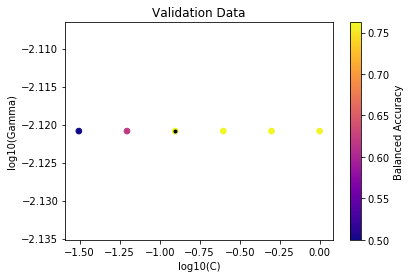

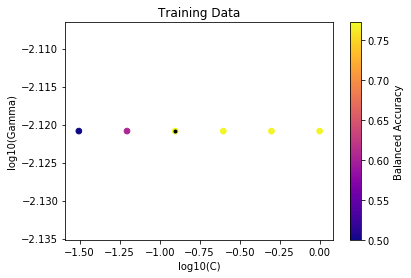

In [8]:
mx_id=np.argmax(valid_bal_acc_srch)
print('Best Validation Accuracy: %f' % valid_bal_acc_srch[mx_id])
print('Using C=%f, gam=%f' % (C_srch[mx_id],gamma_srch[mx_id]))
# print('Best model name is %s' % model_names_srch[mx_id])

plt.figure(1)
plt.clf()
#plt.scatter(np.arange(len(vbacc_ray)),vbacc_ray,c=vbacc_ray)
plt.scatter(np.log10(C_srch),np.log10(gamma_srch),c=valid_bal_acc_srch,cmap='plasma',s=32)
plt.plot(np.log10(C_srch[mx_id]),np.log10(gamma_srch[mx_id]),'k.')
plt.xlabel('log10(C)')
plt.ylabel('log10(Gamma)')
cbar=plt.colorbar()
cbar.set_label('Balanced Accuracy', rotation=90)
plt.title('Validation Data')

plt.figure(2)
plt.clf()
#plt.scatter(np.arange(len(vbacc_ray)),vbacc_ray,c=vbacc_ray)
plt.scatter(np.log10(C_srch),np.log10(gamma_srch),c=train_bal_acc_srch,cmap='plasma',s=32)
plt.plot(np.log10(C_srch[mx_id]),np.log10(gamma_srch[mx_id]),'k.')
plt.xlabel('log10(C)')
plt.ylabel('log10(Gamma)')
cbar=plt.colorbar()
cbar.set_label('Balanced Accuracy', rotation=90)
plt.title('Training Data')

In [27]:
10**(-1.5)

0.03162277660168379

In [ ]:
plt.figure(1)
plt.clf()
plt.scatter(C_srch,gamma_srch)
#plt.scatter(C_srch,gamma_srch,c=valid_bal_acc_srch)
plt.xlabel('C')
plt.ylabel('Gamma')
plt.xscale('log')
plt.yscale('log')

In [ ]:
temp=np.load('/Users/davidgroppe/Desktop/PlvSeSvm.npz')
temp.keys()

In [ ]:
plt.figure(1)
plt.plot(temp['C_srch'],temp['valid_bal_acc_srch'],'-o')
plt.plot(temp['C_srch'],temp['train_bal_acc_srch'],'r--o')
plt.plot(temp['best_C'],temp['test_bal_acc'],'k*')
plt.ylabel('Valid Balance Acc')
plt.xlabel('C')
plt.xscale('log')
print('gamma=%f' % temp['gamma'])